<a id='top'></a>

# CSCI 3022: Intro to Data Science - Fall 2021 Final Exam Coding
***

This exam coding segment is due on Canvas by **11:59 PM on Tuesday December 14*. Your solutions to theoretical questions should be done in Markdown/MathJax directly below the associated question.  Your solutions to computational questions should include any specified Python code and results as well as written commentary on your conclusions.  


Note: There are a number of images in this problem.  If you can't get them to display properly, they are hosted [here](https://drive.google.com/drive/folders/1M4kBMd23roiDVnfbYQmPmzsR1bPZAxzX?usp=sharing).  

**Here are the rules:** 

1. All work, code and analysis, must be your own. 
2. You may use your course notes, posted lecture slides, textbooks, in-class notebooks, and homework solutions as resources.  You may also search online for answers to general knowledge questions like the form of a probability distribution function or how to perform a particular operation in Python/Pandas. 
3. This is meant to be like a coding portion of your midterm exam. So, the instructional team will be a bit less helpful than we typically are with homework. For example, we will not check answers, significantly debug your code, and so on.  But please don't feel like you're totally alone on this: feel free to ask questions or ask for help, and we will decide how best to provide that assistance.
4. If something is left open-ended, it is because we want to see how you approach the kinds of problems you will encounter in the wild, where it will not always be clear what sort of tests/methods should be applied. Feel free to ask clarifying questions though.
5. You may **NOT** post to message boards or other online resources asking for help.
6. You may **NOT** copy-paste solutions *from anywhere*.
7. You may **NOT** collaborate with classmates or anyone else.
8. In short, **your work must be your own**. It really is that simple.

Violation of the above rules will result in an immediate academic sanction (*at the very least*, you will receive a 0 on this exam coding assignment or an F in the course, depending on severity), and a trip to the Honor Code Council.

**By submitting this assignment, you agree to abide by the rules given above.**

***

**NOTES**: 

- You may not use late days on the exam coding nor can you drop your exam coding grades. 
- If you have a question for us, post it as a **PRIVATE** message on Piazza.  If we decide that the question is appropriate for the entire class, then we will add it to a exam coding clarifications thread. (NB: you should use public posts for the epidemiology "warmup" prompts).
- Do **NOT** load or use any Python packages that are not available in Anaconda 3.6. The exam coding assignmnet is designed to be completed using only the packages in the first given code cell.
- Some problems with code may be autograded.  If we provide a function API **do not** change it.  If we do not provide a function API then you're free to structure your code however you like. 
- Submit only this Jupyter notebook to Canvas.  Do not compress it using tar, rar, zip, etc. 
- This should go without saying, but... For any question that asks you to calculate something, you **must show all work to receive credit**. Sparse or nonexistent work will receive sparse or nonexistent credit.

---
**Shortcuts:**  [Problem 1](#p1) | [Problem 2](#p2) | [Problem 3](#p2) | [Bottom](#bot)

---

In [1]:
import numpy as np 
import pandas as pd 
from scipy import stats
import statsmodels.api as sm
import matplotlib.pylab as plt 
from patsy import dmatrices
import seaborn as sns
import itertools
%matplotlib inline

<br>

---
[Back to top](#top)
<a id='p1'></a>

## [30 points] Problem 1: Automating a fit

**1 A: Here's some data!**

Load the data in `not_so_linear.csv` and create an (x,y) scatter plot of it.  

The data come from a  NIST study, where the variable `y` is ultrasonic response when subjected to `x` of metal distance.

It's pretty clear that $y$ is **a** function of $x$, but it's not a straight line!  So we may want to ask: what is the **best** polynomial of the form $$y=\beta_0+\beta_1\cdot x +\beta_2\cdot x ^2 +\beta_3\cdot x ^3 +\dots +\beta_n\cdot x^n$$
to capture the data.



In [2]:
#plot data here.
df=pd.read_csv('/home/jovyan/3022/exams/finalexam/not_so_linear.csv')
df.head(10)

,y,x
0,92.900,0.500
1,78.700,0.625
2,64.200,0.750
3,64.900,0.875
4,57.100,1.000
5,43.300,1.250
6,31.100,1.750
7,23.600,2.250
8,31.050,1.750
9,23.775,2.250


Text(0.5, 1.0, 'Metal Distance vs Ultrasonic Response Scatterplot')

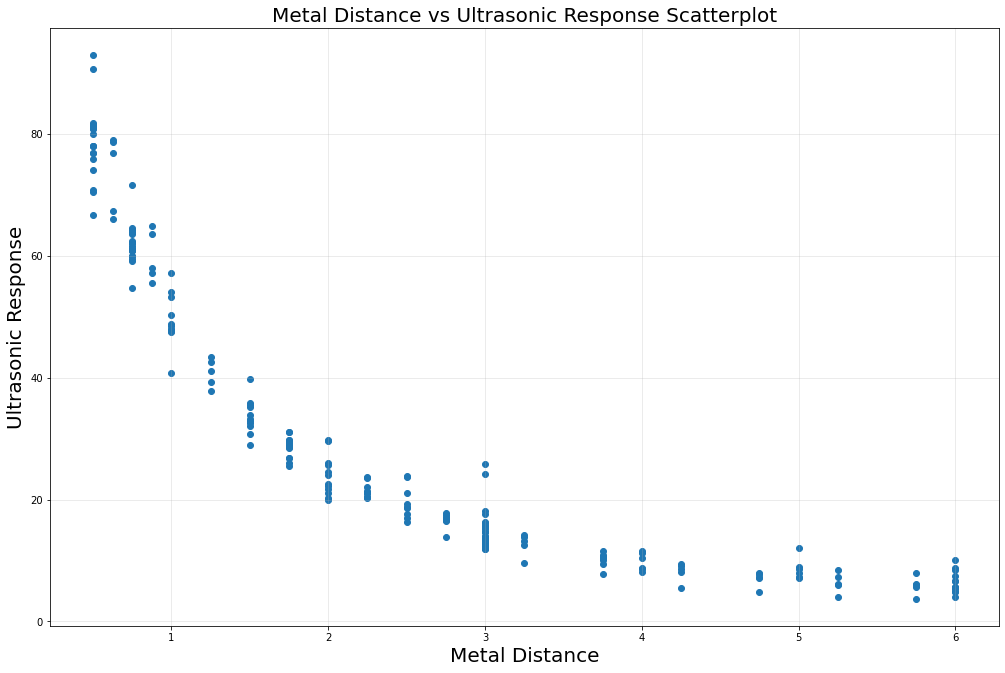

In [3]:
x = df['x']
y = df['y']
fig, ax = plt.subplots(1,1, figsize = (17,11))
plt.scatter(x, y)
ax.grid(alpha = .3)
ax.set_xlabel("Metal Distance", fontsize = 20)
ax.set_ylabel("Ultrasonic Response", fontsize = 20)
ax.set_title("Metal Distance vs Ultrasonic Response Scatterplot", fontsize = 20)

**1 B: find the best polynomial fit**

Our goal is to find how many powers of $x$ we need to capture the curve well.  Recall that if we add extra *predictors* or powers of $x$ to a model the SSE and $R^2$ of that model will always appear better.  But at some point, they don't improve by enough to be "worth" the extra terms in the model.

Write a function `best_poly(df)` with the following usage:
- Argument: the original data frame `df` with columns `y` and `x`
- Your function should return a stats.OLS.fit() argument that corresponds to the **best** fit $y=X\beta$ according adjusted $R^2$ where you consider including up to 10 powers of X.  

In other words, your function should fit **all 11** of the linear models 

Model 0: $y=\beta_0$, 

Model 1: $y=\beta_0+\beta_1x^1$, 

Model 2: $y=\beta_0+\beta_1x^1+\beta_2x^2$, 

$\vdots $

Model 10: $y=\beta_0+\beta_1x^1+\beta_2x^2+\dots+\beta_{10}x^{10}$


and then `return` the one with the best adjusted R-squared.

In [4]:
def best_poly(df):
    total = ['x']
    for t in total:
        slope, intercept, rval, pValue, standardError = stats.linregress(df[t], df["y"])
    return intercept, slope, pValue
winninglm = best_poly(df)
print(winninglm)

(61.09946350865518, -12.119972802299737, 8.113196986002205e-59)


**1 C: Visualize your results**

For the best model by adjusted R-squared, print the `summary()` table and make a plot with the overlay the resulting fitted line over the data.  Does it appear as though we appropriately captured the structure of the data?

**Note:** Even if you can't get the function to "automate" the best polynomial in 1B, you should be able to do this part by hand if you need it!

SLR for Metal Distance vs Ultrasonic Response
intercept =  61.09946350865518
slope =  -12.119972802299737
p-value =  8.113196986002205e-59


Text(0.5, 1.0, 'Metal Distance vs Ultrasonic Response Scatterplot')

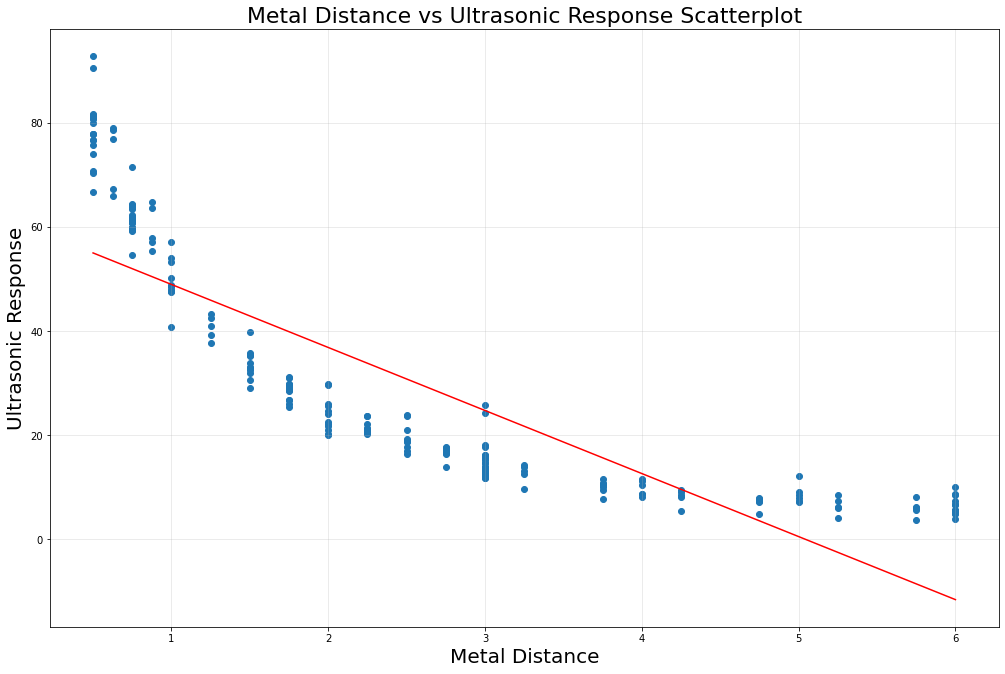

In [5]:
print("SLR for Metal Distance vs Ultrasonic Response")
print("intercept = ", winninglm[0])
print("slope = ", winninglm[1])
print("p-value = ", winninglm[2])
slope, intercept, rval, pValue, standardError = stats.linregress(x,y)
# Plot data and SLR model 
fig, ax = plt.subplots(1,1, figsize = (17,11))
xplot = np.linspace(np.min(x), np.max(x))
ax.scatter(x, y)
ax.plot(xplot, intercept + slope * xplot, color = 'red')
ax.grid(alpha = 0.3)
ax.set_xlabel("Metal Distance", fontsize = 20)
ax.set_ylabel("Ultrasonic Response", fontsize = 20)
ax.set_title("Metal Distance vs Ultrasonic Response Scatterplot", fontsize = 22)

It appears that the residual line accurately captures the structure of the data. This is evident by the line closely following the trends and relation of the data.

<br>

---
[Back to top](#top)
<a id='p2'></a>

## [30 points] Problem 2: Testing for Streaks

One measure we're often interested in for modeling is whether or not our data is exhibiting patterns, where nearby observations behave similarly to one another.  We explored one case of this briefly in the last problem of HW9, and to date have used simple plots of residuals to determine whether not the exhibit clumping, where positive and negatively signed residuals tend to appear in grouping of the same type.  In practice, this is quite common whenever one of your $X$ *predictor* variables is either **location** or **time**, since nearby data points in either of those tend to have similar errors.

In tihs problem we'll explore a simplified variant of a common diagnostic for whether or a not a list of number is exhibiting streakiness in the clumping of positive and negative values, the [Wald-Wolfowitz Runs Test](https://en.wikipedia.org/wiki/Wald%E2%80%93Wolfowitz_runs_test).  I recommend skimming the link before you start.

Instead of the exact statistic of the Wald test, we're going to come up with two other measures to create a hypothesis test of whether or not a list of signed numbers are exhibiting regular amounts of clumping or not.  Before we can create any kind of hypothesis test, we should write a function to count the runs in a list of numbers.



**2 A: Implementing some statistics**

    
Implement a function `count_runs` that takes a list (with length at least 2) of `float` values.  It should return `count, longest`, where

- `count`: The number of distinct + or - runs in that list
- `longest`:The length of the single longest streak of same-signed values in the list

For general implementation:
- You should count `0` as positive
- You may find it easier to convert your list of floats into 0 and 1 or True and False to denote positive/negative.  This is optional.
- There are a number of ways to do this.  Given below is some example syntax via `itertools` (groupby).  You may also extract information from e.g. numpy's argsort, but don't import any packages not already in the header.  If your implementation is inefficient, you may find the later parts of this problem take a long time to run.


In [6]:
#example usage for itertools.groupby on "signs" (NOT FLOATS)
np.random.seed(2020)
binarylist=np.random.choice(['+', '-'], size=14)
print('Simulated signs:', binarylist)
counts = np.array([(item, len(list(objects))) for item, objects in itertools.groupby(binarylist)])
counts

#your goal is to extract:
#the number of distinct runs (looks like 7!)
#the length of the longest run (looks like 5!)

Simulated signs: ['+' '+' '-' '+' '-' '-' '-' '-' '-' '+' '-' '+' '+' '+']


array([['+', '2'],
       ['-', '1'],
       ['+', '1'],
       ['-', '5'],
       ['+', '1'],
       ['-', '1'],
       ['+', '3']], dtype='<U21')

In [7]:
def count_runs(x):
    #Do the thing!  Make sure 'x' can be floats, unlike the dummy example above
    
    #calculating the number of runs
    count, longest = 1, 1
    i = 0
    while i < len(x) - 1:
        if(x[i+1] >= 0 and x[i] < 0):
            count = count + 1
        if(x[i+1] < 0 and x[i] >=0):
            count = count + 1
        i = i + 1
        
    #calculating the longest run
    i = 0
    longest = 1
    maxLongest = 0
    while i < (len(x)-1):
 
        if (x[i] >= 0 and x[i + 1] >= 0):
            longest += 1
        elif (x[i] < 0 and x[i + 1] < 0):
            longest += 1
        else:
            longest = 1
             
        #Updating the maximum
        if(longest >= maxLongest):
            maxLongest = longest
        i = i + 1
    return count, maxLongest

**2 B: Trying out the statistic.**

Try out your statistic on a few quick test cases to make sure it's working.

Some examples to sanity check your function.

- An input of [3,3,1,-1,-2] should return (2,3), since there are 2 runs (3 positive number then 2 negative numbers) the longest of which is the first 3.
- An input of [1,-1,1,-1,1,-1] should return (6,1).
- An input of [1,1,1,1,1,1] should return (1,6).


In [8]:
print(count_runs([3,3,1,-1,-2]))
print(count_runs([1,-1,1,-1,1,-1]))
print(count_runs([1,1,1,1,1,1]))

(2, 3)
(6, 1)
(1, 6)


**2 C : Hypothesis Testing Setup**

Our goal is to take the output of a regression model - usually in our `.resid` object - and decide whether or not the residuals are clumping or not.  State the null and alternative hypothesis for a test that presumes that the residuals are unpatterned, and rejects this only if there is significant statistical evidence to the contrary.

Null Hypothesis, $H_o$: Each element in the list is independent from one another, and therefore exhibit a regular amount of clumping.

Alternative Hypothesis, $H_a$: Each element in the list is dependent on one another, and therefore exhibit either a limited or excessive amount of clumping.

**2 D : Hypothesis Testing Simulations**

We can use the `count_runs` function to determine a reasonable set of values for longest run and number of runs.  In other words: we need a rejection region for our test.  Simulate 1000 batches of 214 $N(0,1)$ random variables.  For each of the 1000 batch, compute the `count_runs` statistics of longest run and number of runs.

Visualize the distributions of both statistics into side-by-side histograms.

Then describe a **rejection region** for the the two-tailed $\alpha=0.03$ hypothesis test from part 2C.

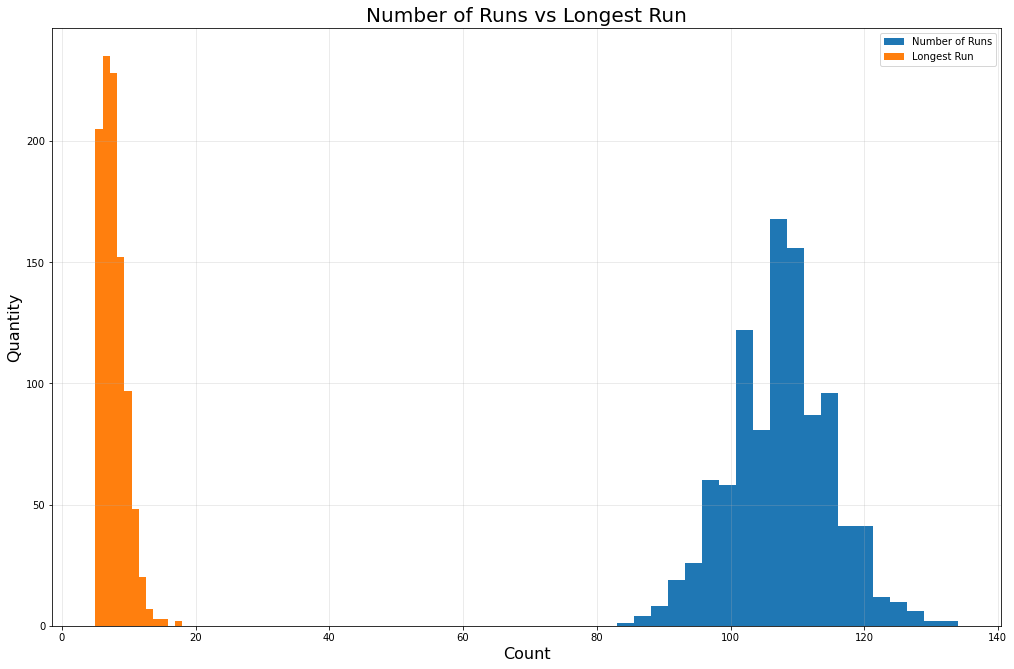

In [9]:
#setting the mean and standard deviation
mu = 0
sigma = 1
hist1, hist2 = [], []
countHist = np.array(hist1)
longestHist = np.array(hist2)
i = 0
s = np.random.normal(mu, sigma, 214)
while i < 1000:
    s = np.random.normal(mu, sigma, 214)
    countHist = np.append(countHist, count_runs(s)[0])
    longestHist = np.append(longestHist, count_runs(s)[1])
    i = i + 1
    
#plotting the data
fig, ax = plt.subplots(1,1, figsize = (17,11))
ax.hist(countHist, bins = 20)
ax.hist(longestHist, bins = 12)
ax.set_title("Number of Runs vs Longest Run", fontsize = 20)
ax.set_xlabel("Count", fontsize = 16)
ax.set_ylabel("Quantity", fontsize = 16)
ax.legend(['Number of Runs', 'Longest Run'])
ax.grid(alpha = .3)

The rejection region follows a 2 tailed hypothesis, where should the mean lie within $/alpha = .03$ or less, we accept the Null Hypothesis $H_o$

**2 E : Apply your test**

Consider performing simple linear regression $y=\beta_0+\beta_1x$ for the `not_so_linear.csv` data from problem 1.  If we were to apply a runs rest to the residuals (`.resid`) from this model, what values do we get from `count_runs`?  Are they within the rejection region?  Should they be?

**Note:**  You'll need to make sure you sort the data by increasing x before you apply this, because for regression we look for clumping of signs as the preditor increases!

Text(0.5, 1.0, 'Original Y values vs Residuals of Least Squares')

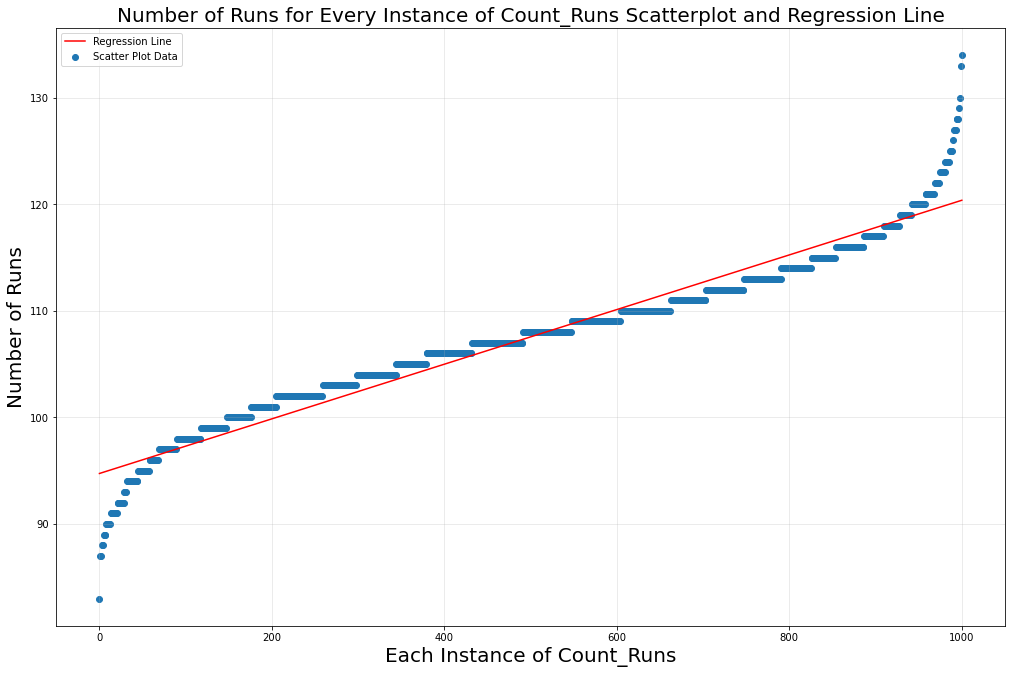

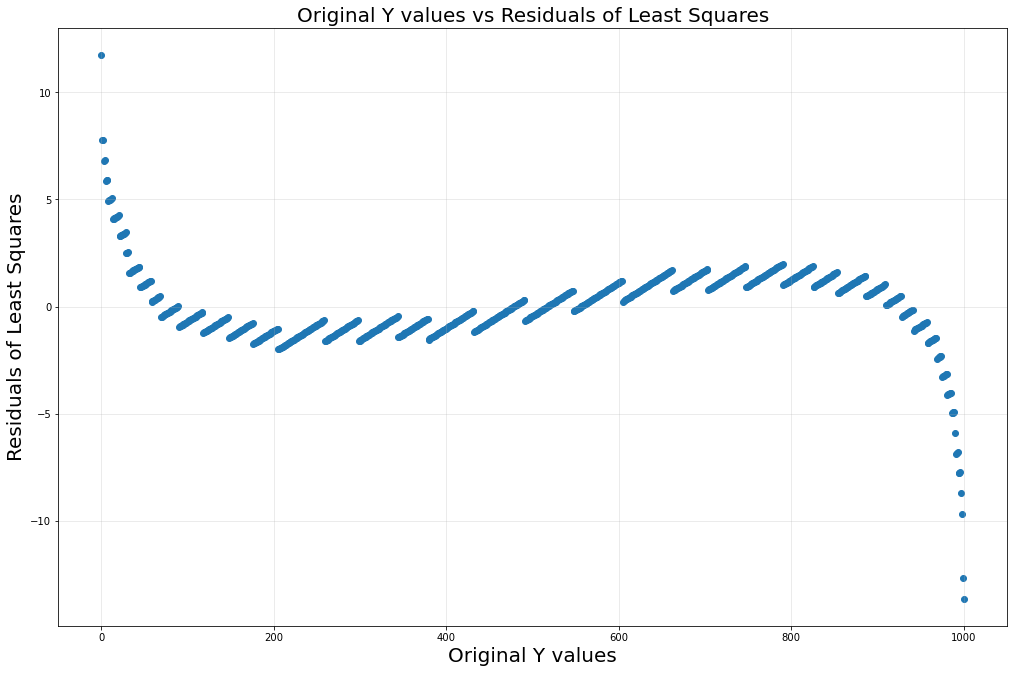

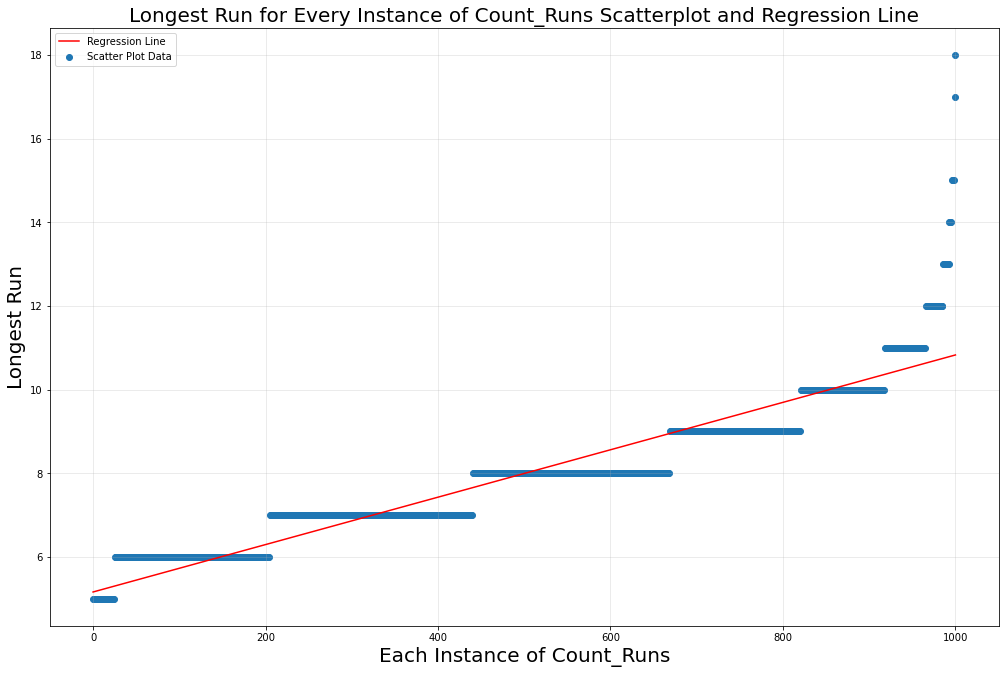

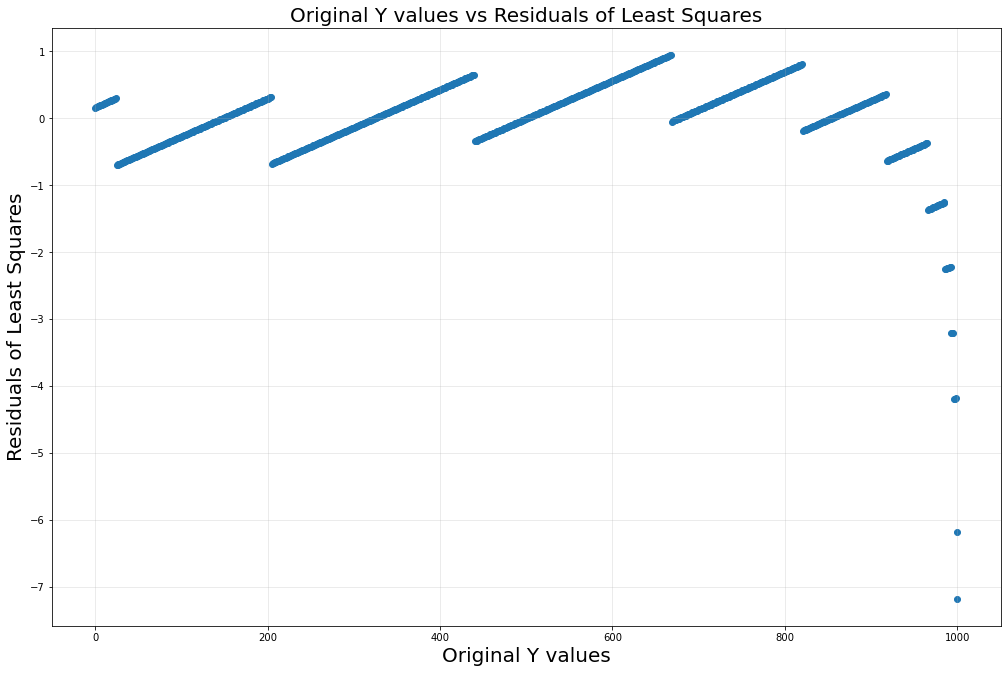

In [10]:
fig, ax = plt.subplots(1,1, figsize = (17,11))
y = np.sort(countHist)
x = np.linspace(0, 1000, 1000)
plt.scatter(x, y)
ax.grid(alpha = .3)
ax.set_xlabel("Each Instance of Count_Runs", fontsize = 20)
ax.set_ylabel("Number of Runs", fontsize = 20)
ax.set_title("Number of Runs for Every Instance of Count_Runs Scatterplot and Regression Line", fontsize = 20)
#calculating the means
n = np.size(x)
meanX = np.mean(x)
meanY = np.mean(y)
#calculating the deviation
newXY = np.sum(y*x) - n*meanY*meanX
newXX = np.sum(x*x) - n*meanX*meanX
#calculating the coeficients
coef1 = newXY / newXX
coef2 = meanY - coef1*meanX
final = (coef2, coef1)
#calculating the final line
line = final[0] + final[1]*x
plt.plot(x, line, color = 'red')
ax.legend(['Regression Line', 'Scatter Plot Data'])

#plotting the residuals
histo = line - y
fig, ax = plt.subplots(1,1, figsize = (17,11))
plt.scatter(x, histo)
ax.grid(alpha = .3)
ax.set_xlabel("Original Y values", fontsize = 20)
ax.set_ylabel("Residuals of Least Squares", fontsize = 20)
ax.set_title("Original Y values vs Residuals of Least Squares", fontsize = 20)

#new graph, plotting the longest runs
fig, ax = plt.subplots(1,1, figsize = (17,11))
y = np.sort(longestHist)
x = np.linspace(0, 1000, 1000)
plt.scatter(x, y)
ax.grid(alpha = .3)
ax.set_xlabel("Each Instance of Count_Runs", fontsize = 20)
ax.set_ylabel("Longest Run", fontsize = 20)
ax.set_title("Longest Run for Every Instance of Count_Runs Scatterplot and Regression Line", fontsize = 20)
#calculating the means
n = np.size(x)
meanX = np.mean(x)
meanY = np.mean(y)
#calculating the deviation
newXY = np.sum(y*x) - n*meanY*meanX
newXX = np.sum(x*x) - n*meanX*meanX
#calculating the coeficients
coef1 = newXY / newXX
coef2 = meanY - coef1*meanX
final = (coef2, coef1)
#calculating the final line
line = final[0] + final[1]*x
plt.plot(x, line, color = 'red')
ax.legend(['Regression Line', 'Scatter Plot Data'])

#new graph, plotting the residuals
histo = line - y
fig, ax = plt.subplots(1,1, figsize = (17,11))
plt.scatter(x, histo)
ax.grid(alpha = .3)
ax.set_xlabel("Original Y values", fontsize = 20)
ax.set_ylabel("Residuals of Least Squares", fontsize = 20)
ax.set_title("Original Y values vs Residuals of Least Squares", fontsize = 20)

It does not appear that the values from count_runs are within the rejection region. Therefore we can accept the alternative hypothesis $H_a$

<br>

---
[Back to top](#top)
<a id='p3'></a>

## [40 points] Problem 3: Multiple Linear Regression

Load the data set in `houses`, with an opening snipper below.  The data includes sale prices of 24 houses from a midwetern town in the 1970's.   You are told that you need to quantify how price can be explained and predicted by the feature of the house.

The variables available in the data set are labeled as follows:

* sales:    the sales price of the house (in 1000s of dollars)
* tax: 	    the local taxes
* bath: 	the number of bathrooms
* lot: 	    the lot size (1000s of ft)
* size: 	the living space (1000s of ft)
* garage: 	number of parking spots in the garage
* rooms: 	number of rooms
* bedrooms: number of bedrooms
* age: 	    age in years
* fire: 	number of fireplaces


In [11]:
dfhouse=pd.read_csv('/home/jovyan/3022/exams/finalexam/houses.txt', delimiter = "\t")
dfhouse.columns=['tax','bath','lot','size','garage','rooms','bedrooms','age','fire','sales']
dfhouse.head(30)


,tax,bath,lot,size,garage,rooms,bedrooms,age,fire,sales
0,4.918,1.0,3.472,0.998,1.0,7,4,42,0,25.9
1,5.021,1.0,3.531,1.500,2.0,7,4,62,0,29.5
2,4.543,1.0,2.275,1.175,1.0,6,3,40,0,27.9
3,4.557,1.0,4.050,1.232,1.0,6,3,54,0,25.9
4,5.060,1.0,4.455,1.121,1.0,6,3,42,0,29.9
5,3.891,1.0,4.455,0.988,1.0,6,3,56,0,29.9
6,5.898,1.0,5.850,1.240,1.0,7,3,51,1,30.9
7,5.604,1.0,9.520,1.501,0.0,6,3,32,0,28.9
8,5.828,1.0,6.435,1.225,2.0,6,3,32,0,35.9
9,5.300,1.0,4.988,1.552,1.0,6,3,30,0,31.5


**Part 3 A: Explore**

Make pairwise scatter plots of the continuous predictors/covariates, both against each other and against the outcome (expenditures).   Does the relationship between the independent variables and the dependent variables appear to be linear?  Do there appear to be independent variables that are collinear?

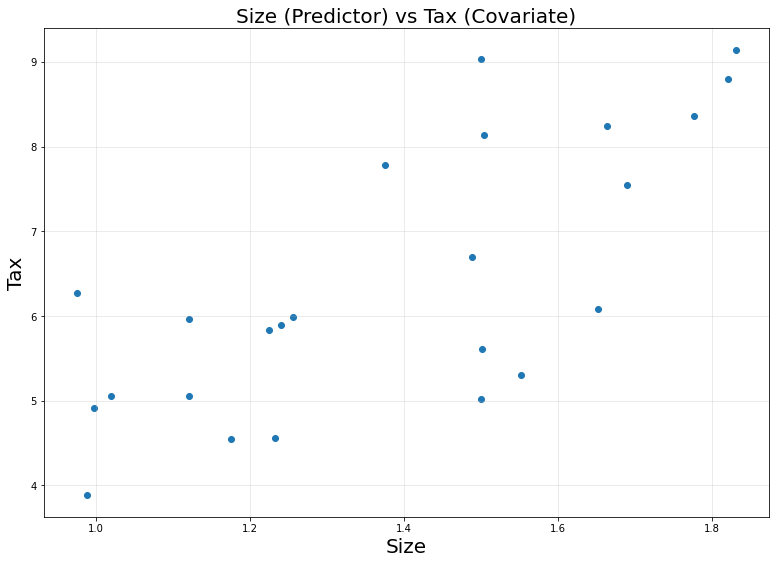

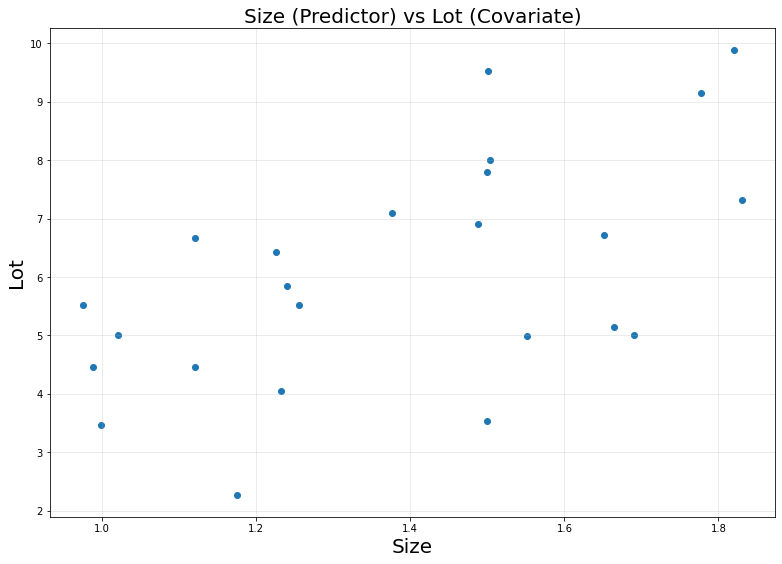

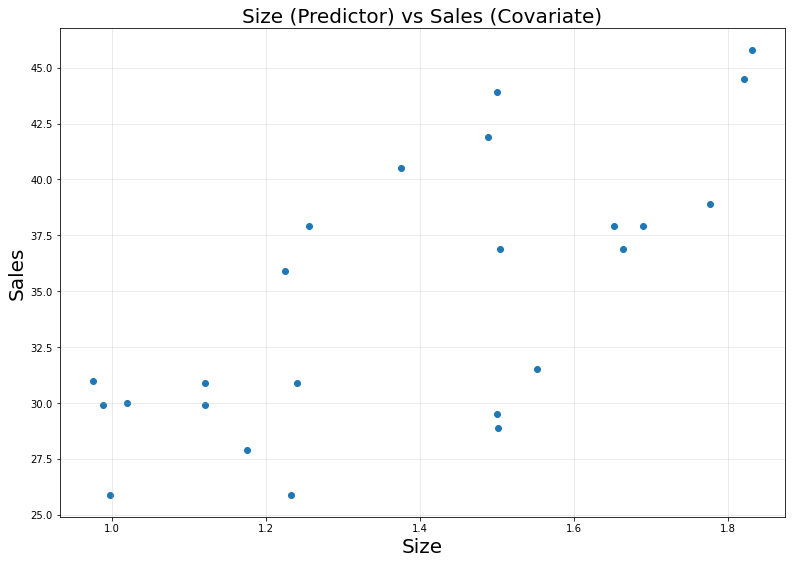

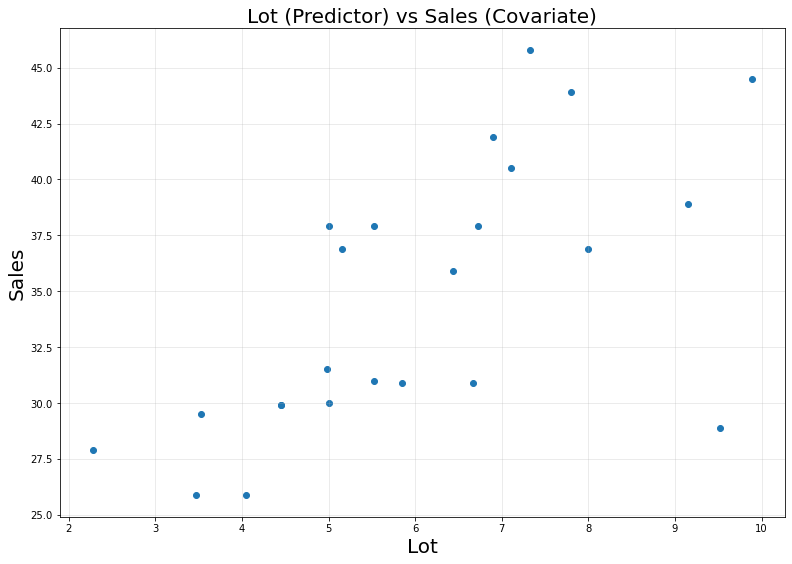

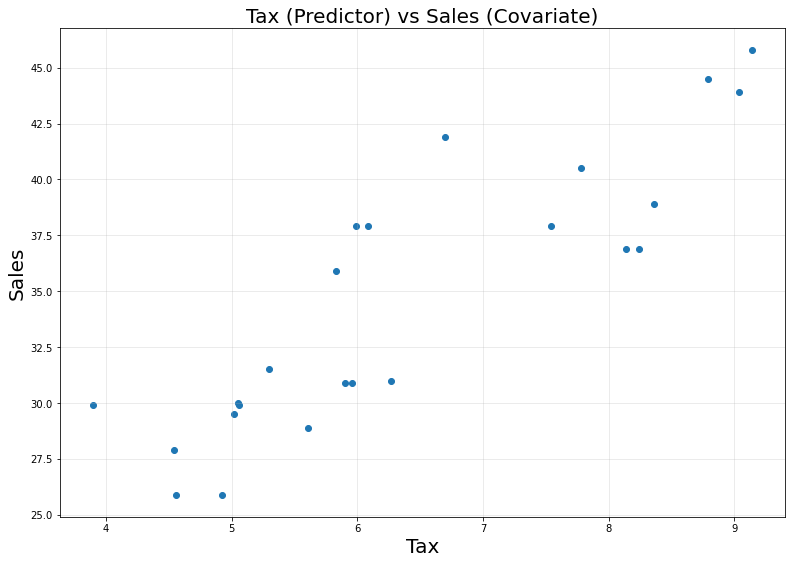

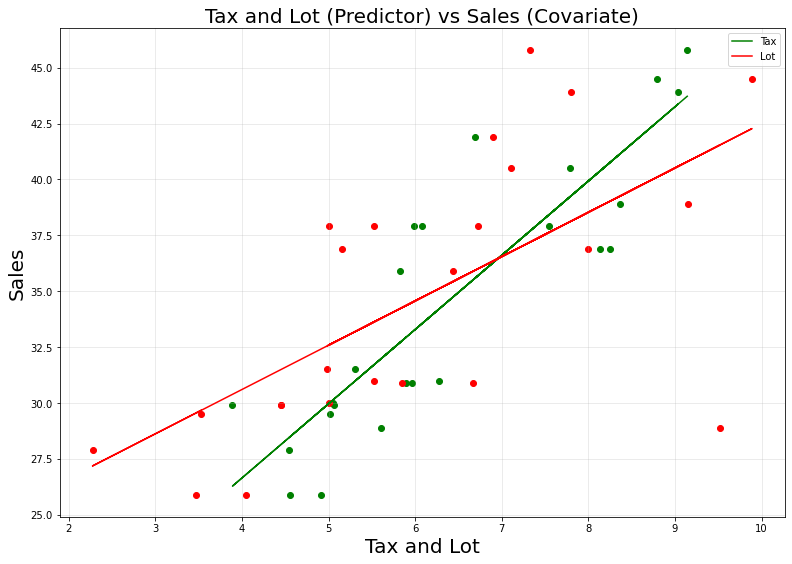

In [12]:
#Plotting Size vs Tax
fig, ax = plt.subplots(1,1, figsize = (13,9))
x = dfhouse['size']
y = dfhouse['tax']
plt.scatter(x,y)
ax.set_xlabel("Size", fontsize = 20)
ax.set_ylabel("Tax", fontsize = 20)
ax.set_title("Size (Predictor) vs Tax (Covariate)", fontsize = 20)
ax.grid(alpha = .3)

#Plotting Size vs Lot
fig, ax = plt.subplots(1,1, figsize = (13,9))
x = dfhouse['size']
y = dfhouse['lot']
plt.scatter(x,y)
ax.set_xlabel("Size", fontsize = 20)
ax.set_ylabel("Lot", fontsize = 20)
ax.set_title("Size (Predictor) vs Lot (Covariate)", fontsize = 20)
ax.grid(alpha = .3)

#Plotting Size vs Sales
fig, ax = plt.subplots(1,1, figsize = (13,9))
x = dfhouse['size']
y = dfhouse['sales']
plt.scatter(x,y)
ax.set_xlabel("Size", fontsize = 20)
ax.set_ylabel("Sales", fontsize = 20)
ax.set_title("Size (Predictor) vs Sales (Covariate)", fontsize = 20)
ax.grid(alpha = .3)

#Plotting Lot vs Sales
fig, ax = plt.subplots(1,1, figsize = (13,9))
x = dfhouse['lot']
y = dfhouse['sales']
plt.scatter(x,y)
ax.set_xlabel("Lot", fontsize = 20)
ax.set_ylabel("Sales", fontsize = 20)
ax.set_title("Lot (Predictor) vs Sales (Covariate)", fontsize = 20)
ax.grid(alpha = .3)

#Plotting Tax vs Sales
fig, ax = plt.subplots(1,1, figsize = (13,9))
x = dfhouse['tax']
y = dfhouse['sales']
plt.scatter(x,y)
ax.set_xlabel("Tax", fontsize = 20)
ax.set_ylabel("Sales", fontsize = 20)
ax.set_title("Tax (Predictor) vs Sales (Covariate)", fontsize = 20)
ax.grid(alpha = .3)

fig, ax = plt.subplots(1,1, figsize = (13,9))
x = dfhouse['tax']
y = dfhouse['sales']
plt.scatter(x,y, color = 'green')


#calculating the means
n = np.size(x)
meanX = np.mean(x)
meanY = np.mean(y)
#calculating the deviation
newXY = np.sum(y*x) - n*meanY*meanX
newXX = np.sum(x*x) - n*meanX*meanX
#calculating the coeficients
coef1 = newXY / newXX
coef2 = meanY - coef1*meanX
final = (coef2, coef1)
#calculating the final line
line = final[0] + final[1]*x
plt.plot(x, line, color = 'green')


x1 = dfhouse['lot']
y = dfhouse['sales']
plt.scatter(x1,y, color = 'red')


#calculating the means
n = np.size(x1)
meanX = np.mean(x1)
meanY = np.mean(y)
#calculating the deviation
newXY = np.sum(y*x1) - n*meanY*meanX
newXX = np.sum(x1*x1) - n*meanX*meanX
#calculating the coeficients
coef1 = newXY / newXX
coef2 = meanY - coef1*meanX
final = (coef2, coef1)
#calculating the final line
line1 = final[0] + final[1]*x1
plt.plot(x1, line1, color = 'red')
ax.set_xlabel("Tax and Lot", fontsize = 20)
ax.set_ylabel("Sales", fontsize = 20)
ax.set_title("Tax and Lot (Predictor) vs Sales (Covariate)", fontsize = 20)
ax.grid(alpha = .3)
ax.legend(['Tax', 'Lot'])


**Part 3 B: Make a Model**

By adding columns to a minimal model or by subtracting columns from the full model, use one of the criteria in the class to create a reasonable candidate model.  These may include:

- stepwise optimization of adjusted $R^2$
- stepwise inclusion/removal of most or least-significant T-tests on coefficients
- removing columns based on VIFs

Use a markdown cell to explain exactly what method you're using to construct your model.

In [13]:
#getting the relevant stats
slope, inte, r, p, error = stats.linregress(x,y)
def linefitline(b):
    return inte + slope * b

#calculating the first line
subtract = linefitline(x)-y
first = 0
for i in subtract:
    first = first + (i*i)
    
#calculating the second line
line2 = np.full(len(x),[y.mean()])
subtract1 = line2 - y
second = 0
for g in subtract1:
    second = second + (g ** 2)

print("Variance of linear model: ", first)
print("Totatl Variance from flattened regression: ", second)
r1 = (second - first)/second
print("R^2 = ", r1)
print(r1, "percent of the change in sales can be explained by the change in taxes")
print("\n")

#getting the relevent stats
slope, inte, r, p, error = stats.linregress(x1,y)
def linefitline(b):
    return inte + slope * b

#calculating the first line
subtract = linefitline(x1)-y
first = 0
for g in subtract:
    first = first + (g ** 2)

#already calculated second line above
print("Variance of linear model: ", first)
print("Totatl Variance from flattened regression: ", second)
r1 = (second - first)/second
print("R^2 = ", r1)
print(r1, "percent of the change in sales can be explained by the change in lot")

#dropping irrelevent collumns
newDf = dfhouse.drop('bedrooms', 1)
newDf = newDf.drop('rooms', 1)
newDf = newDf.drop('fire', 1)
newDf = newDf.drop('bath', 1)
newDf = newDf.drop('garage', 1)

Variance of linear model:  196.46771889734822
Totatl Variance from flattened regression:  831.5095833333332
R^2 =  0.7637216421369989
0.7637216421369989 percent of the change in sales can be explained by the change in taxes


Variance of linear model:  482.7470773461256
Totatl Variance from flattened regression:  831.5095833333332
R^2 =  0.4194329361654473
0.4194329361654473 percent of the change in sales can be explained by the change in lot


/tmp/ipykernel_443/1035636508.py:45: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  newDf = dfhouse.drop('bedrooms', 1)
/tmp/ipykernel_443/1035636508.py:46: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  newDf = newDf.drop('rooms', 1)
/tmp/ipykernel_443/1035636508.py:47: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  newDf = newDf.drop('fire', 1)
/tmp/ipykernel_443/1035636508.py:48: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  newDf = newDf.drop('bath', 1)
/tmp/ipykernel_443/1035636508.py:49: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  newDf = newDf.drop('gar

To calculate $R^2$, calculated two lines: a line of regression, and an adjusted flat line where the x axis was the regression line. I squared the residuals from each line and divided the difference over the first line, getting my $R^2$ value. I then removed the irrelevent columns like fire, garage and bath which had a limited number of values and couldn't gather any meaningful results from.

**Part 3 C: Validate your Model**


Perform a thorough discussion of the underlying regression assumptions of your model in part 1B.  You should plot a predictor vs. residuals plot for each column and histogram OR qqplot of the overall residuals.  Make sure to also check for non-linearity.

Text(0.5, 1.0, 'Original x values vs Residuals of Least Squares')

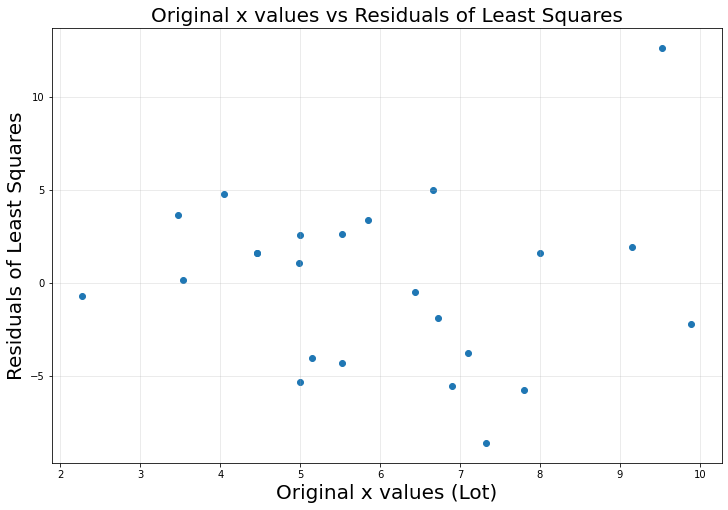

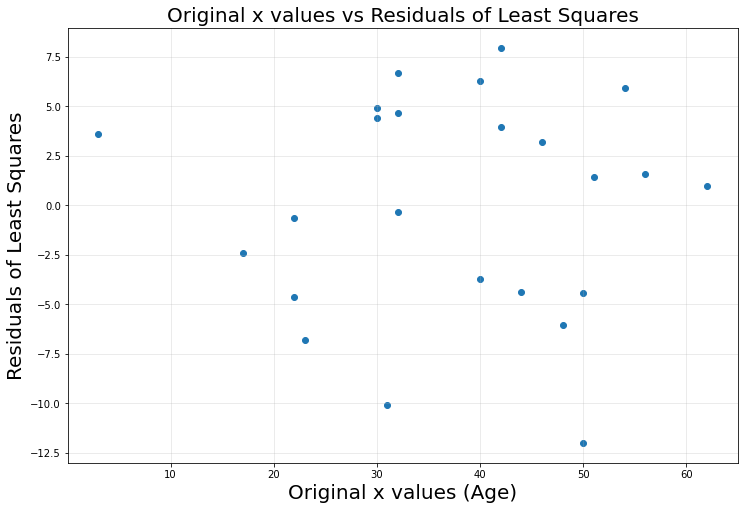

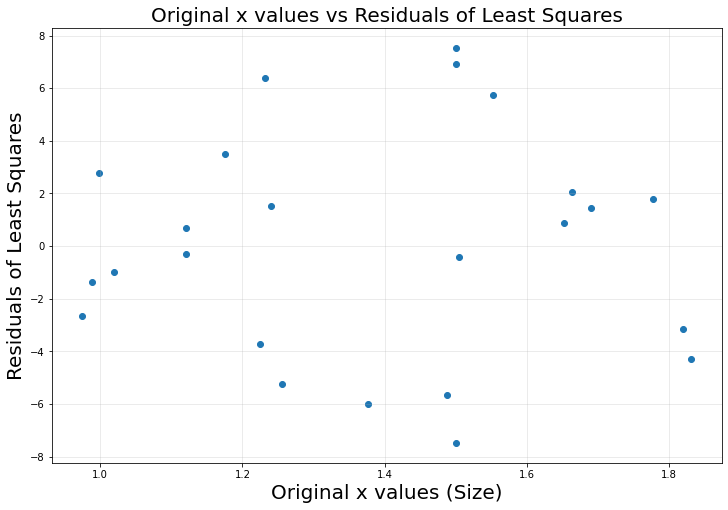

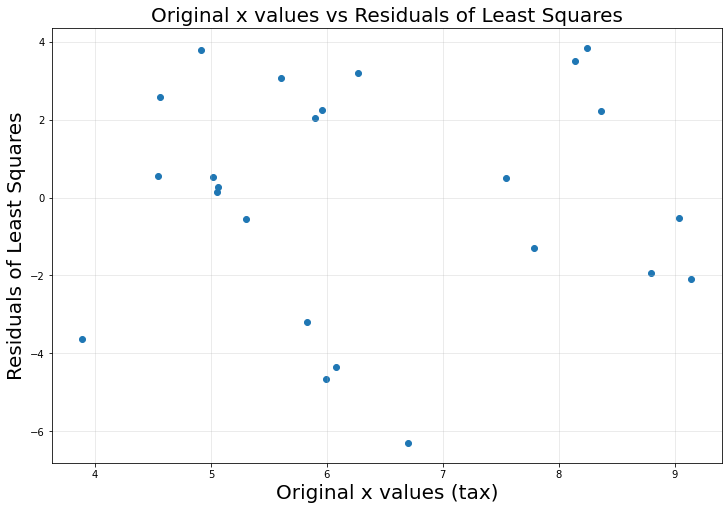

In [14]:
#plot for lot and sales
x = newDf['lot']
y = newDf['sales']
#calculating the means
n = np.size(x)
meanX = np.mean(x)
meanY = np.mean(y)
#calculating the deviation
newXY = np.sum(y*x) - n*meanY*meanX
newXX = np.sum(x*x) - n*meanX*meanX
#calculating the coeficients
coef1 = newXY / newXX
coef2 = meanY - coef1*meanX
final = (coef2, coef1)
#calculating the final line
line = final[0] + final[1]*x

#plotting the second plot
histo = line - y

#plotting the third plot
fig, ax = plt.subplots(1,1, figsize = (12,8))
plt.scatter(x, histo)
ax.grid(alpha = .3)
ax.set_xlabel("Original x values (Lot)", fontsize = 20)
ax.set_ylabel("Residuals of Least Squares", fontsize = 20)
ax.set_title("Original x values vs Residuals of Least Squares", fontsize = 20)


#plot for age and sales
x = newDf['age']
y = newDf['sales']
#calculating the means
n = np.size(x)
meanX = np.mean(x)
meanY = np.mean(y)
#calculating the deviation
newXY = np.sum(y*x) - n*meanY*meanX
newXX = np.sum(x*x) - n*meanX*meanX
#calculating the coeficients
coef1 = newXY / newXX
coef2 = meanY - coef1*meanX
final = (coef2, coef1)
#calculating the final line
line = final[0] + final[1]*x

#plotting the second plot
histo = line - y

#plotting the third plot
fig, ax = plt.subplots(1,1, figsize = (12,8))
plt.scatter(x, histo)
ax.grid(alpha = .3)
ax.set_xlabel("Original x values (Age)", fontsize = 20)
ax.set_ylabel("Residuals of Least Squares", fontsize = 20)
ax.set_title("Original x values vs Residuals of Least Squares", fontsize = 20)


#plot for size and sales
x = newDf['size']
y = newDf['sales']
#calculating the means
n = np.size(x)
meanX = np.mean(x)
meanY = np.mean(y)
#calculating the deviation
newXY = np.sum(y*x) - n*meanY*meanX
newXX = np.sum(x*x) - n*meanX*meanX
#calculating the coeficients
coef1 = newXY / newXX
coef2 = meanY - coef1*meanX
final = (coef2, coef1)
#calculating the final line
line = final[0] + final[1]*x

#plotting the second plot
histo = line - y

#plotting the third plot
fig, ax = plt.subplots(1,1, figsize = (12,8))
plt.scatter(x, histo)
ax.grid(alpha = .3)
ax.set_xlabel("Original x values (Size)", fontsize = 20)
ax.set_ylabel("Residuals of Least Squares", fontsize = 20)
ax.set_title("Original x values vs Residuals of Least Squares", fontsize = 20)


#plot for tax and sales
x = newDf['tax']
y = newDf['sales']
#calculating the means
n = np.size(x)
meanX = np.mean(x)
meanY = np.mean(y)
#calculating the deviation
newXY = np.sum(y*x) - n*meanY*meanX
newXX = np.sum(x*x) - n*meanX*meanX
#calculating the coeficients
coef1 = newXY / newXX
coef2 = meanY - coef1*meanX
final = (coef2, coef1)
#calculating the final line
line = final[0] + final[1]*x

#plotting the second plot
histo = line - y

#plotting the third plot
fig, ax = plt.subplots(1,1, figsize = (12,8))
plt.scatter(x, histo)
ax.grid(alpha = .3)
ax.set_xlabel("Original x values (tax)", fontsize = 20)
ax.set_ylabel("Residuals of Least Squares", fontsize = 20)
ax.set_title("Original x values vs Residuals of Least Squares", fontsize = 20)

**Part 3 D: Tune your Model**


Based on your work in parts 1B and 1C, **iterate** on your model.  Consider removing terms or adding higher-order polynomials one at a time unless you are satisfied that your model captures the data as well as possible.  Each time you add or subtract a term from your model, you should repeat the steps in parts B and C: a summary table and exploration of assumptions.

**Part 3 E: Explain your Model**

**Justify** your choices: there are a lot of ways to choose a "best" model: we've mentioned e.g. only including significant predictors versus F-tests versus optimizing R-squared.  Explain what terms you chose and why they were appropriate! 

There were several collumns in part B that didn't provide any meanginful data. For example, the fire column only consisted of 0s and 1s. This kind of binary data set made for a scatterplot that was effectively 2 collumns of data. The same goes for the bedrooms, bath and garage columns. As a result, I removed these columns. In part C, I made residual models for tax, size, age and lot against sales. However, each of these plots didn't provide any noticble trends or relationships between the data and sales. 

Rubric notes:

This problem is by design very open-ended.  It is meant to reflect a real-world problem solving process.  For this problem, at the very least, you should:
- Include and explain which method you're using to removel redundant columns in part B
- Include a sentence for **each** of the diagnositic plots in part C, determining whether your current model is meeting the standard assumptions of multiple linear regression
- Include some code, sentences, and/or visualizations demonstrating what alternative models you tried and/or considered.
- Include a sentence interpreting why your final model **makes sense** in the context of the problem - and it if doesn't, you'll want to try to explain why not.

Graders will look for the both the diagnostic plots and **plenty** of complete English sentences describing what you're doing and why you think it will help answer the data science question: how do we create the best model we can to quantify how price can be explained and predicted by the features of the house.

<br>

---

[Back to top](#top)
<a id='bot'></a>